In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn config
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Formatting

In [27]:
file = pd.read_csv('../../data_collection/trends/data/daily_interest.csv')
file = file.rename(columns={'Unnamed: 0':'relative_date'})
file = file.set_index('relative_date')

In [28]:
file.shape

(269, 864)

In [29]:
file

,Anonymice,Anonymice_date,Anonymice NFT,Anonymice NFT_date,Vox Collectibles,Vox Collectibles_date,Vox Collectibles NFT,Vox Collectibles NFT_date,Galacticapes,Galacticapes_date,...,Winter Bears,Winter Bears_date,Winter Bears NFT,Winter Bears NFT_date,Tronwars,Tronwars_date,Tronwars NFT,Tronwars NFT_date,Nanopass,Nanopass_date
relative_date,,,,,,,,,,,,,,,,,,,,,
134_before,0,2021-05-05,0,2021-05-05,0,2021-03-29,0,2021-03-29,0,2021-05-15,...,2,2021-05-15,0,2021-05-15,0.0,2021-09-23,0.0,2021-09-23,0.0,2021-07-31
133_before,0,2021-05-06,0,2021-05-06,0,2021-03-30,0,2021-03-30,0,2021-05-16,...,4,2021-05-16,0,2021-05-16,0.0,2021-09-24,0.0,2021-09-24,0.0,2021-08-01
132_before,0,2021-05-07,0,2021-05-07,0,2021-03-31,0,2021-03-31,0,2021-05-17,...,5,2021-05-17,0,2021-05-17,0.0,2021-09-25,0.0,2021-09-25,0.0,2021-08-02
131_before,0,2021-05-08,0,2021-05-08,0,2021-04-01,0,2021-04-01,0,2021-05-18,...,4,2021-05-18,0,2021-05-18,0.0,2021-09-26,0.0,2021-09-26,0.0,2021-08-03
130_before,0,2021-05-09,0,2021-05-09,0,2021-04-02,0,2021-04-02,0,2021-05-19,...,9,2021-05-19,0,2021-05-19,0.0,2021-09-27,0.0,2021-09-27,0.0,2021-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130_after,0,2022-01-24,0,2022-01-24,0,2021-12-18,0,2021-12-18,0,2022-02-03,...,20,2022-02-03,0,2022-02-03,NaN,NaN,NaN,NaN,NaN,NaN
131_after,0,2022-01-25,0,2022-01-25,0,2021-12-19,0,2021-12-19,0,2022-02-04,...,46,2022-02-04,0,2022-02-04,NaN,NaN,NaN,NaN,NaN,NaN
132_after,0,2022-01-26,0,2022-01-26,22,2021-12-20,0,2021-12-20,0,2022-02-05,...,37,2022-02-05,0,2022-02-05,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Removing date columns, averaging collection and collection+" NFT" columns
for col in file.columns:
    if '_date' in col:
        file = file.drop(columns=col)
        continue
    if ' NFT' in col:
        file[col.split(' NFT')[0]] = (file[col] + file[col.split(' NFT')[0]]) / 2
        file = file.drop(columns=col)

In [31]:
file = file.reset_index()

In [32]:
def clean_dates(date):
    if '_before' in date:
        return(int('-'+date.split("_before")[0]))
    elif '_after' in date:
        return(int(date.split('_after')[0]))
    else:
        return 0

In [33]:
file

,relative_date,Anonymice,Vox Collectibles,Galacticapes,Irenedao,Byoland,Lonely Alien Space Club,888 Inner Circle,Mfer,Farmers World,...,Fat Ape Club,Gauntlets,Linksdao,Doodles,The N Project,Clonex,Sorare,Winter Bears,Tronwars,Nanopass
0,134_before,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,21.0,...,0.0,21.0,0.0,24.5,30.0,6.5,0,1.0,0.0,0.0
1,133_before,0.0,0.0,0,0.0,0.0,0.0,0.0,14.5,19.0,...,0.0,29.0,0.0,27.5,11.5,4.0,0,2.0,0.0,0.0
2,132_before,0.0,0.0,0,0.0,0.0,0.0,0.0,14.5,17.0,...,0.0,20.0,0.0,24.5,4.0,3.5,0,2.5,0.0,0.0
3,131_before,0.0,0.0,0,0.0,0.0,0.0,0.0,5.0,23.0,...,0.0,30.0,0.0,25.0,16.5,2.0,0,2.0,0.0,0.0
4,130_before,0.0,0.0,0,0.0,0.0,0.0,0.0,5.5,14.5,...,0.0,32.0,0.0,29.5,14.5,4.5,0,4.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,130_after,0.0,0.0,0,NaN,NaN,0.0,0.0,NaN,48.5,...,0.0,19.5,NaN,41.0,12.0,NaN,0,10.0,NaN,NaN
265,131_after,0.0,0.0,0,NaN,NaN,0.0,0.0,NaN,57.5,...,0.0,35.5,NaN,33.0,12.0,NaN,0,23.0,NaN,NaN
266,132_after,0.0,11.0,0,NaN,NaN,39.0,59.5,NaN,39.5,...,0.0,32.5,NaN,64.0,29.5,NaN,0,18.5,NaN,NaN
267,133_after,0.0,11.0,0,NaN,NaN,16.5,33.0,NaN,49.5,...,8.5,32.0,NaN,49.0,13.0,NaN,0,7.0,NaN,NaN


In [34]:
file['day'] = file['relative_date'].apply(lambda x: clean_dates(x))

In [35]:
file = file.drop(columns=['relative_date'])

In [36]:
# Filtering to only the 10 weeks before and after minting date
# file = file[file['week'] > -10]

In [37]:
file = file.set_index('day')

In [40]:
file.head()

,Anonymice,Vox Collectibles,Galacticapes,Irenedao,Byoland,Lonely Alien Space Club,888 Inner Circle,Mfer,Farmers World,Duskbreakers,...,Fat Ape Club,Gauntlets,Linksdao,Doodles,The N Project,Clonex,Sorare,Winter Bears,Tronwars,Nanopass
day,,,,,,,,,,,,,,,,,,,,,
-134,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,...,0.0,21.0,0.0,24.5,30.0,6.5,0,1.0,0.0,0.0
-133,0.0,0.0,0,0.0,0.0,0.0,0.0,14.5,19.0,0.0,...,0.0,29.0,0.0,27.5,11.5,4.0,0,2.0,0.0,0.0
-132,0.0,0.0,0,0.0,0.0,0.0,0.0,14.5,17.0,0.0,...,0.0,20.0,0.0,24.5,4.0,3.5,0,2.5,0.0,0.0
-131,0.0,0.0,0,0.0,0.0,0.0,0.0,5.0,23.0,0.0,...,0.0,30.0,0.0,25.0,16.5,2.0,0,2.0,0.0,0.0
-130,0.0,0.0,0,0.0,0.0,0.0,0.0,5.5,14.5,0.0,...,0.0,32.0,0.0,29.5,14.5,4.5,0,4.5,0.0,0.0


## Plotting collections in groups of 5

In [41]:
n = 5
groups = [(file.columns[i:i + n]) for i in range(0, len(file.columns), n)]
for group in groups:
    group = list(group)
    plt.figure()
    sns.lineplot(data=file[group])
    
    plt.xlabel("days_relative_mint")
    plt.ylabel("interest")

    plt.savefig('line_plots/groups_5/line_plot_{}.png'.format(group))
    plt.close()

## Plotting collections individually

In [42]:
for col in file.columns:
    plt.figure()
    sns.lineplot(data=file[col])
    
    plt.xlabel("days_relative_mint")
    plt.ylabel("interest")
    plt.title(col)

    plt.savefig('line_plots/individual/line_plot_{}.png'.format(col))
    plt.close()

# Try plotting price and trends

In [84]:
searches = pd.read_csv('../../data_collection/trends/data/daily_interest.csv')

In [85]:
searches['Anonymice'] = (searches['Anonymice'] + searches['Anonymice NFT']) / 2

In [86]:
searches = searches[['Anonymice_date', 'Anonymice']]
searches.columns=['date', 'val']
searches['date'] = searches['date'].apply(lambda x: pd.to_datetime(x))
searches['type'] = 'searches'

In [87]:
sales = pd.read_csv('../../data_collection/sales_records/Anonymice - Historical Sales.csv')
sales.columns=['date', 'val']
sales['date'] = sales['date'].apply(lambda x: pd.to_datetime(x))
sales['type'] = 'sales'

In [88]:
searches.head()

,date,val,type
0,2021-05-05,0.0,searches
1,2021-05-06,0.0,searches
2,2021-05-07,0.0,searches
3,2021-05-08,0.0,searches
4,2021-05-09,0.0,searches


In [89]:
sales.head()

,date,val,type
0,2021-09-16,1125042.78,sales
1,2021-09-17,3934885.69,sales
2,2021-09-18,1747688.82,sales
3,2021-09-19,5421374.80,sales
4,2021-09-20,2031786.74,sales


In [100]:
total = searches.append(sales)
total.dtypes

date    datetime64[ns]
val            float64
type            object
dtype: object

In [101]:
total

,date,val,type
0,2021-05-05,0.00,searches
1,2021-05-06,0.00,searches
2,2021-05-07,0.00,searches
3,2021-05-08,0.00,searches
4,2021-05-09,0.00,searches
...,...,...,...
162,2022-02-25,27231.61,sales
163,2022-02-26,12203.72,sales
164,2022-02-27,10794.51,sales
165,2022-02-28,65517.72,sales


In [108]:
total = total.set_index('date')

In [83]:
total.head()

,date,search_freq,sales
0,2021-09-16,42.5,1125042.78
1,2021-09-17,26.0,3934885.69
2,2021-09-18,19.0,1747688.82
3,2021-09-19,28.5,5421374.80
4,2021-09-20,66.0,2031786.74


In [109]:
total

,val,type
date,,
2021-05-05,0.00,searches
2021-05-06,0.00,searches
2021-05-07,0.00,searches
2021-05-08,0.00,searches
2021-05-09,0.00,searches
...,...,...
2022-02-25,27231.61,sales
2022-02-26,12203.72,sales
2022-02-27,10794.51,sales


Text(0.5, 1.0, 'price and searches - Anonymice NFT')

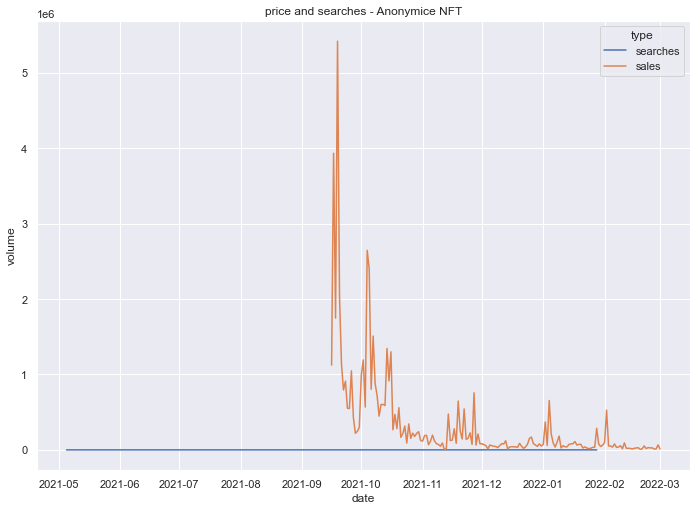

In [111]:
# sns.catplot(x='date', y="val", hue='type', data=total, kind='point')

plt.figure()
sns.lineplot(x='date', y='val', hue='type', data=total)

plt.xlabel("date")
plt.ylabel("volume")
plt.title('price and searches - Anonymice NFT')

# plt.savefig('line_plots/individual/line_plot_{}.png'.format(col))
# plt.close()